In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

In [2]:
import tensorflow_probability.substrates.jax as tfp
import flax.linen as nn
import jax
import jax.numpy as jnp
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf

dist = tfp.distributions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from dataloader import *
from retrain_fun import *
import datetime
import scipy.stats as st
import random
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-06-30 02:55:38.445964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess(only_positive=True)

In [4]:
train_list= [[2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [5]:
data_aggregated

,clotheswasher1,dishwasher1,air1,refrigerator1,furnace1,dataid,localminute,aggr
2407,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:00:00-06,0.132
2408,0.000,0.001,0.004,0.120,0.006,3538,2018-01-01 00:01:00-06,0.131
2409,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:02:00-06,0.132
2410,0.000,0.001,0.005,0.120,0.006,3538,2018-01-01 00:03:00-06,0.132
2411,0.000,0.001,0.005,0.119,0.006,3538,2018-01-01 00:04:00-06,0.131
...,...,...,...,...,...,...,...,...
13100534,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:26:00-06,0.010
13100535,0.002,0.001,0.000,0.004,0.003,7951,2018-02-07 15:27:00-06,0.010
13100536,0.002,0.001,0.000,0.011,0.003,7951,2018-02-07 15:28:00-06,0.017
13100537,0.002,0.000,0.000,0.004,0.003,7951,2018-02-07 15:29:00-06,0.009


In [6]:
pool_list

[[5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]]

In [7]:
len(pool_list[0])

10

Train Set No: 1
Iteration No:  0
(50495, 5)


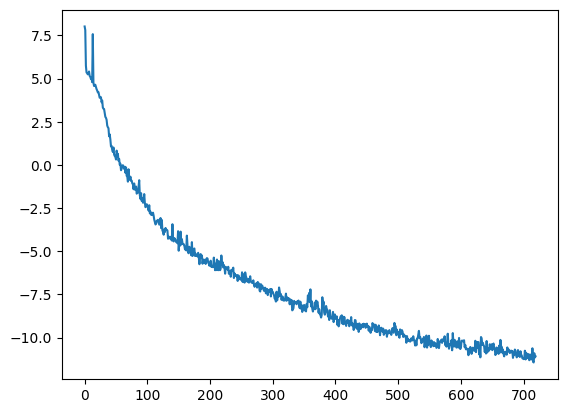

(2, 58739, 5)
RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
2018-03-01 00:00:00-0600
2018-03-02 00:00:00-06:00
2018-03-02 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-04 00:00:00-06:00
2018-03-04 00:00:00-06:00
2018-03-05 00:00:00-06:00
2018-03-05 00:00:00-06:00
2018-03-06 00:00:00-06:00
2018-03-06 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-01 00:00:00-0600
2018-03-02 00:00:00-06:00
2018-03-02 

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278]


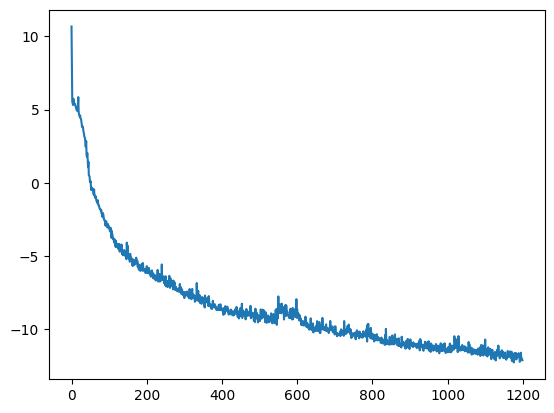

RMSE : [651.47064   63.11932  118.34574  112.265045 320.69913 ] MAE  : [259.63498   40.192894  62.075867  44.703426 154.19086 ] NLL : 5.195313930511475
2018-03-06 00:00:00-0600
2018-03-07 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-06 00:00:00-0600
2018-03-07 00:00:00-06:00
2018-03-07 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746]


2023-06-30 03:04:35.669091: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[111858,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[111858,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


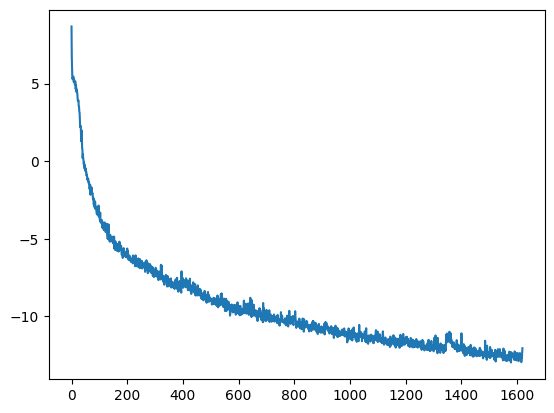

RMSE : [305.84824   59.622173  93.95178   68.11078  147.92096 ] MAE  : [125.51922   36.52274   51.004757  18.392712  57.464596] NLL : 4.547698974609375
2018-03-11 00:00:00-0600
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-11 00:00:00-0600
2018-03-12 00:00:00-06:00
2018-03-12 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156]


2023-06-30 03:07:26.691002: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[155094,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[155094,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:07:27.732368: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[155094,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[155094,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06

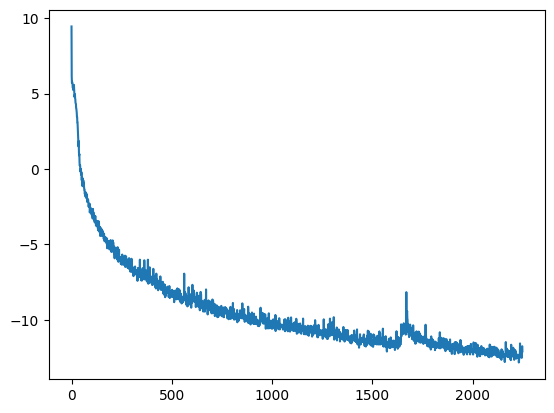

RMSE : [219.2109    56.15606   69.541954  33.75371   75.69518 ] MAE  : [77.13755  33.141983 37.051052  8.540916 17.359108] NLL : 4.495154857635498
2018-03-16 00:00:00-0600
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-16 00:00:00-0600
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642]


2023-06-30 03:09:59.441700: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[213546,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[213546,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:10:00.554693: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[213546,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[213546,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:

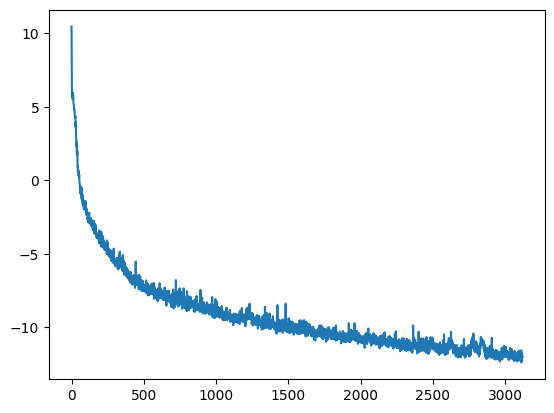

RMSE : [184.49898   54.850708  70.85369   20.031479  69.32493 ] MAE  : [64.14013   32.27179   36.938778   4.0043907 16.397804 ] NLL : 4.565825939178467
2018-03-21 00:00:00-0600
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-03-21 00:00:00-0600
2018-03-22 00:00:00-06:00
2018-03-22 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642 8565]


2023-06-30 03:12:23.862083: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[269499,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[269499,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:12:25.231333: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[269499,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[269499,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:

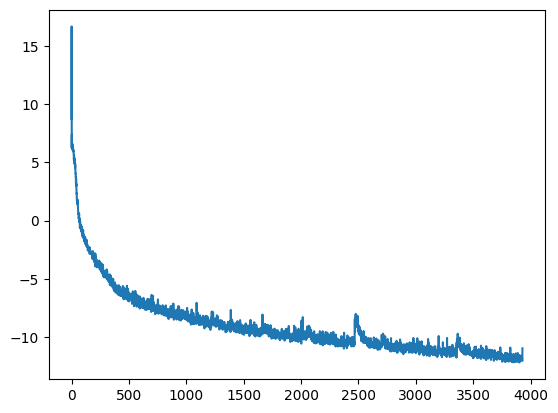

RMSE : [154.31488   52.22509   69.561195  20.277554  64.71481 ] MAE  : [54.209545  29.866299  36.49698    4.6078715 11.404388 ] NLL : 5.079041957855225
2018-03-27 00:00:00-0600
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-03-27 00:00:00-0600
2018-03-28 00:00:00-06:00
2018-03-28 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642 8565 7800]


2023-06-30 03:14:42.577951: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[331236,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[331236,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:14:44.239846: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[331236,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[331236,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:

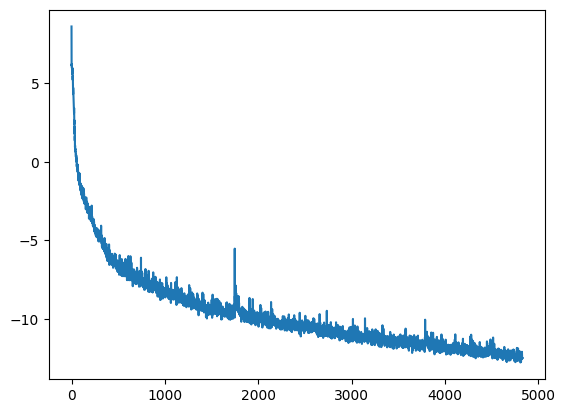

RMSE : [158.08258   52.567596  69.44926   19.764524  65.737854] MAE  : [57.282722  29.103014  34.24356    4.0774965 10.63371  ] NLL : 7.264752388000488
2018-04-01 00:00:00-0600
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-01 00:00:00-0600
2018-04-02 00:00:00-06:00
2018-04-02 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642 8565 7800 7536]


2023-06-30 03:16:54.668113: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[399739,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[399739,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:16:56.646971: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[399739,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[399739,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:

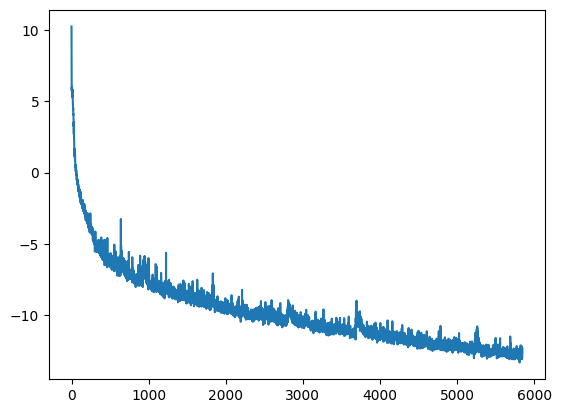

RMSE : [138.91922   51.50525   70.43282   19.948029  66.353745] MAE  : [47.570988  28.212788  34.24966    3.8760667 11.956543 ] NLL : 5.548951148986816
2018-04-06 00:00:00-0600
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-06 00:00:00-0600
2018-04-07 00:00:00-06:00
2018-04-07 00:00:0

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642 8565 7800 7536 9160]


2023-06-30 03:22:57.526434: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[472683,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[472683,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:22:59.819184: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[472683,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[472683,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


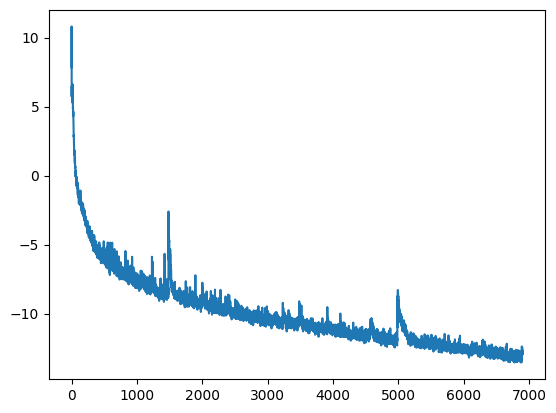

RMSE : [136.745     52.22809   66.62657   19.267164  60.623127] MAE  : [48.661278 28.802183 30.70349   3.695049 10.045149] NLL : 13.75825309753418
2018-04-11 00:00:00-0600
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-11 00:00:00-0600
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:

/home/dhruv.patel/final_active/multitask/retrain_fun.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 5746 8156 1642 8565 7800 7536 9160  661]


2023-06-30 03:25:44.462577: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[551646,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[551646,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-06-30 03:25:47.128893: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[551646,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[551646,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


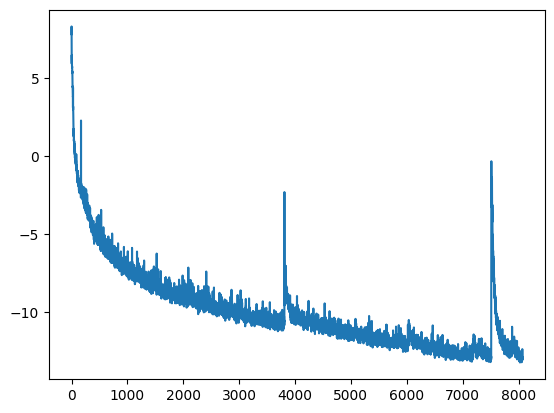

RMSE : [130.34537   52.87529   67.87683   19.284428  55.032207] MAE  : [43.86262   29.538176  31.013521   3.9130104  9.25765  ] NLL : 4.461369037628174
2018-04-16 00:00:00-0600
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-27 00:00:00-06:00
2018-04-27 00:00:00-06:00
2018-04-28 00:00:00-06:00
2018-04-28 00:00:00-06:00
2018-04-29 00:00:00-06:00
2018-04-29 00:00:00-06:00
2018-04-30 00:00:00-06:00
2018-04-30 00:00:00-06:00
2018-05-01 00:00:00-06:00


In [8]:
total_rmse=[]
houseids=[]
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i+1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    #change 1 - removing train test var from function
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    maes = []
    rmse_iter=[]
    houses=[]
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-26 00:00:00-06", "2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06","2018-04-21 00:00:00-06"]
    end= ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    dates = ["2018-03-01 00:00:00-06","2018-03-06 00:00:00-06", "2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-27 00:00:00-06","2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06"]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ",j)
        if(j==0):
            house, houseid,rmsee, maee, train, test= retrain(0, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
        elif(j==10):
            house, houseid,rmsee, maee, train, test= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
        else:
            house, houseid,rmsee, maee, train, test= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], data_aggregated)
            rmse_iter.append(rmsee)
            maes.append(maee)
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
    total_rmse.append(rmse_iter)
    houseids.append(houses)


In [9]:
houseids

[[9278, 5746, 8156, 1642, 8565, 7800, 7536, 9160, 661, 8386]]

In [10]:
rmse_iter = np.array(rmse_iter)
rmse_iter

array([[838.97186 ,  65.4115  , 283.74158 ,  52.868984, 462.44693 ],
       [651.47064 ,  63.11932 , 118.34574 , 112.265045, 320.69913 ],
       [305.84824 ,  59.622173,  93.95178 ,  68.11078 , 147.92096 ],
       [219.2109  ,  56.15606 ,  69.541954,  33.75371 ,  75.69518 ],
       [184.49898 ,  54.850708,  70.85369 ,  20.031479,  69.32493 ],
       [154.31488 ,  52.22509 ,  69.561195,  20.277554,  64.71481 ],
       [158.08258 ,  52.567596,  69.44926 ,  19.764524,  65.737854],
       [138.91922 ,  51.50525 ,  70.43282 ,  19.948029,  66.353745],
       [136.745   ,  52.22809 ,  66.62657 ,  19.267164,  60.623127],
       [130.34537 ,  52.87529 ,  67.87683 ,  19.284428,  55.032207]],
      dtype=float32)

In [11]:
maes = np.array(maes) 

In [12]:
appliances = ['air', 'refrigerator' , 'furnace', 'clothewasher', 'dishwasher']
for i in range(5):
    d = pd.DataFrame(rmse_iter[:,i])
    d1 = pd.DataFrame(maes[:,i])
    if not os.path.exists(f'{appliances[i]}'):
        os.mkdir(f'{appliances[i]}')
    # Save the DataFrame to a CSV file
    d.to_csv(os.path.join(f'{appliances[i]}', "new_RMSE.csv"), index=False)
    d1.to_csv(os.path.join(f'{appliances[i]}', "new_MAE.csv"), index=False)
    
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")


In [13]:
d = pd.DataFrame(rmse_iter)
d.to_csv("new_errors.csv")

In [14]:
house_df= pd.DataFrame(houseids)
house_df.to_csv("new_houseids.csv")

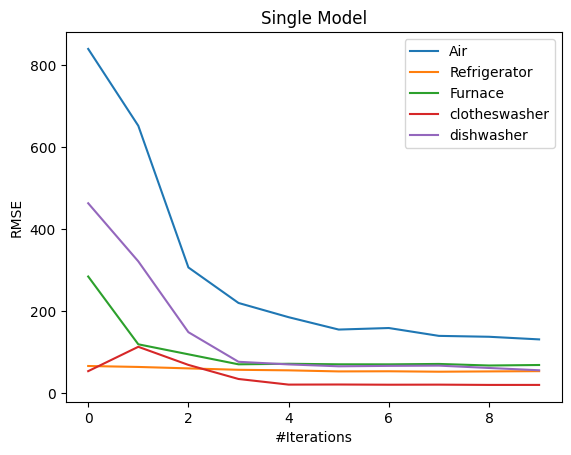

In [15]:
for i in range(5):
    plt.plot(d[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])



In [16]:
import numpy as np
import matplotlib.pyplot as plt
scaled_total_rmse =[]
for i in range(5):
    a = np.array(d[i])
    ans = (a-a.min())/(a.max()-a.min())
    scaled_total_rmse.append(ans)

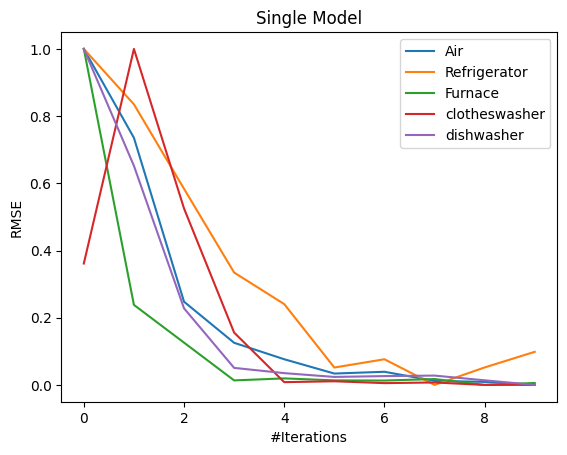

In [17]:
for i in range(5):
    plt.plot(scaled_total_rmse[i])
    plt.xlabel("#Iterations")
    plt.ylabel("RMSE")
    plt.title("Single Model")
    plt.legend(['Air', 'Refrigerator', 'Furnace', 'clotheswasher', 'dishwasher'])

In [18]:
maes_df = pd.DataFrame(maes)


In [19]:
maes_df

,0,1,2,3,4
0,328.138306,41.170593,121.629692,22.690022,248.003448
1,259.634979,40.192894,62.075867,44.703426,154.190857
2,125.519218,36.522739,51.004757,18.392712,57.464596
3,77.137550,33.141983,37.051052,8.540916,17.359108
4,64.140129,32.271790,36.938778,4.004391,16.397804
5,54.209545,29.866299,36.496979,4.607872,11.404388
6,57.282722,29.103014,34.243561,4.077497,10.633710
7,47.570988,28.212788,34.249660,3.876067,11.956543
8,48.661278,28.802183,30.703489,3.695049,10.045149
9,43.862621,29.538176,31.013521,3.913010,9.257650


In [20]:
print(data_aggregated['air1'].mean()*1000, data_aggregated['refrigerator1'].mean()*1000, data_aggregated['furnace1'].mean()*1000, data_aggregated['clotheswasher1'].mean()*1000, data_aggregated['dishwasher1'].mean()*1000)

387.9863080087092 145.74786692064612 179.39920680753877 26.982003007108773 16.52270251359823


: 